In [113]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

# Data Understanding and Exploration

In [114]:
df = pd.read_csv('data/historic_demand_2009_2024_noNaN.csv')
if 'Unnamed: 0' in df.columns:
    df = df.drop(columns=['Unnamed: 0'])
df

,settlement_date,settlement_period,period_hour,nd,tsd,england_wales_demand,embedded_wind_generation,embedded_wind_capacity,embedded_solar_generation,embedded_solar_capacity,non_bm_stor,pump_storage_pumping,ifa_flow,ifa2_flow,britned_flow,moyle_flow,east_west_flow,nemo_flow,is_holiday
0,2009-01-01 00:00:00,1,0:00:00,37910,38704,33939,54,1403,0,0,0,33,2002,0,0,-161,0,0,1
1,2009-01-01 00:30:00,2,0:30:00,38047,38964,34072,53,1403,0,0,0,157,2002,0,0,-160,0,0,1
2,2009-01-01 01:00:00,3,1:00:00,37380,38651,33615,53,1403,0,0,0,511,2002,0,0,-160,0,0,1
3,2009-01-01 01:30:00,4,1:30:00,36426,37775,32526,50,1403,0,0,0,589,1772,0,0,-160,0,0,1
4,2009-01-01 02:00:00,5,2:00:00,35687,37298,31877,50,1403,0,0,0,851,1753,0,0,-160,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278507,2024-12-05 21:30:00,44,21:30:00,29114,31431,27212,5377,6622,0,17194,0,736,558,758,1003,-450,-531,999,0
278508,2024-12-05 22:00:00,45,22:00:00,27204,29846,25477,5486,6622,0,17194,0,868,-193,263,1002,-450,-531,949,0
278509,2024-12-05 22:30:00,46,22:30:00,26006,28805,24428,5594,6622,0,17194,0,944,-274,211,997,-450,-531,943,0
278510,2024-12-05 23:00:00,47,23:00:00,23908,26825,22590,5575,6622,0,17194,0,864,-404,-77,280,-450,-522,338,0


In [115]:
df.dtypes

settlement_date              object
settlement_period             int64
period_hour                  object
nd                            int64
tsd                           int64
england_wales_demand          int64
embedded_wind_generation      int64
embedded_wind_capacity        int64
embedded_solar_generation     int64
embedded_solar_capacity       int64
non_bm_stor                   int64
pump_storage_pumping          int64
ifa_flow                      int64
ifa2_flow                     int64
britned_flow                  int64
moyle_flow                    int64
east_west_flow                int64
nemo_flow                     int64
is_holiday                    int64
dtype: object

In [116]:
df['settlement_date'] = pd.to_datetime(df['settlement_date']) #settlement_date needs to be datetime
df.dtypes

settlement_date              datetime64[ns]
settlement_period                     int64
period_hour                          object
nd                                    int64
tsd                                   int64
england_wales_demand                  int64
embedded_wind_generation              int64
embedded_wind_capacity                int64
embedded_solar_generation             int64
embedded_solar_capacity               int64
non_bm_stor                           int64
pump_storage_pumping                  int64
ifa_flow                              int64
ifa2_flow                             int64
britned_flow                          int64
moyle_flow                            int64
east_west_flow                        int64
nemo_flow                             int64
is_holiday                            int64
dtype: object

In [117]:
missing_values = df.isnull().sum()
print(missing_values)

settlement_date              0
settlement_period            0
period_hour                  0
nd                           0
tsd                          0
england_wales_demand         0
embedded_wind_generation     0
embedded_wind_capacity       0
embedded_solar_generation    0
embedded_solar_capacity      0
non_bm_stor                  0
pump_storage_pumping         0
ifa_flow                     0
ifa2_flow                    0
britned_flow                 0
moyle_flow                   0
east_west_flow               0
nemo_flow                    0
is_holiday                   0
dtype: int64


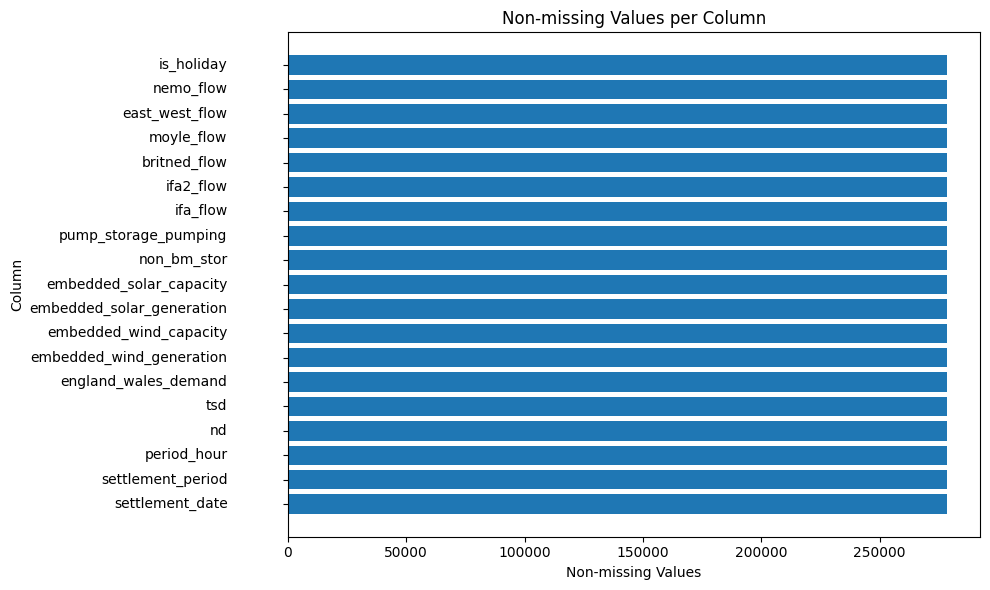

In [118]:
plt.figure(figsize=(10, 6))
plt.barh(missing_values.index, df.notnull().sum().values)
plt.ylabel('Column')
plt.xlabel('Non-missing Values')
plt.yticks(np.arange(len(missing_values.index)), missing_values.index, fontsize=10, va='center', rotation=0)
plt.gca().tick_params(axis='y', pad=40)
plt.title('Non-missing Values per Column')
plt.tight_layout()
plt.show()

In [119]:
numeric_cols = df.select_dtypes(include=[np.number]).columns
outlier_indices = {}

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df[(df[col] < Q1 - 1.5 * IQR) | (df[col] > Q3 + 1.5 * IQR)].index
    outlier_indices[col] = outliers.tolist()

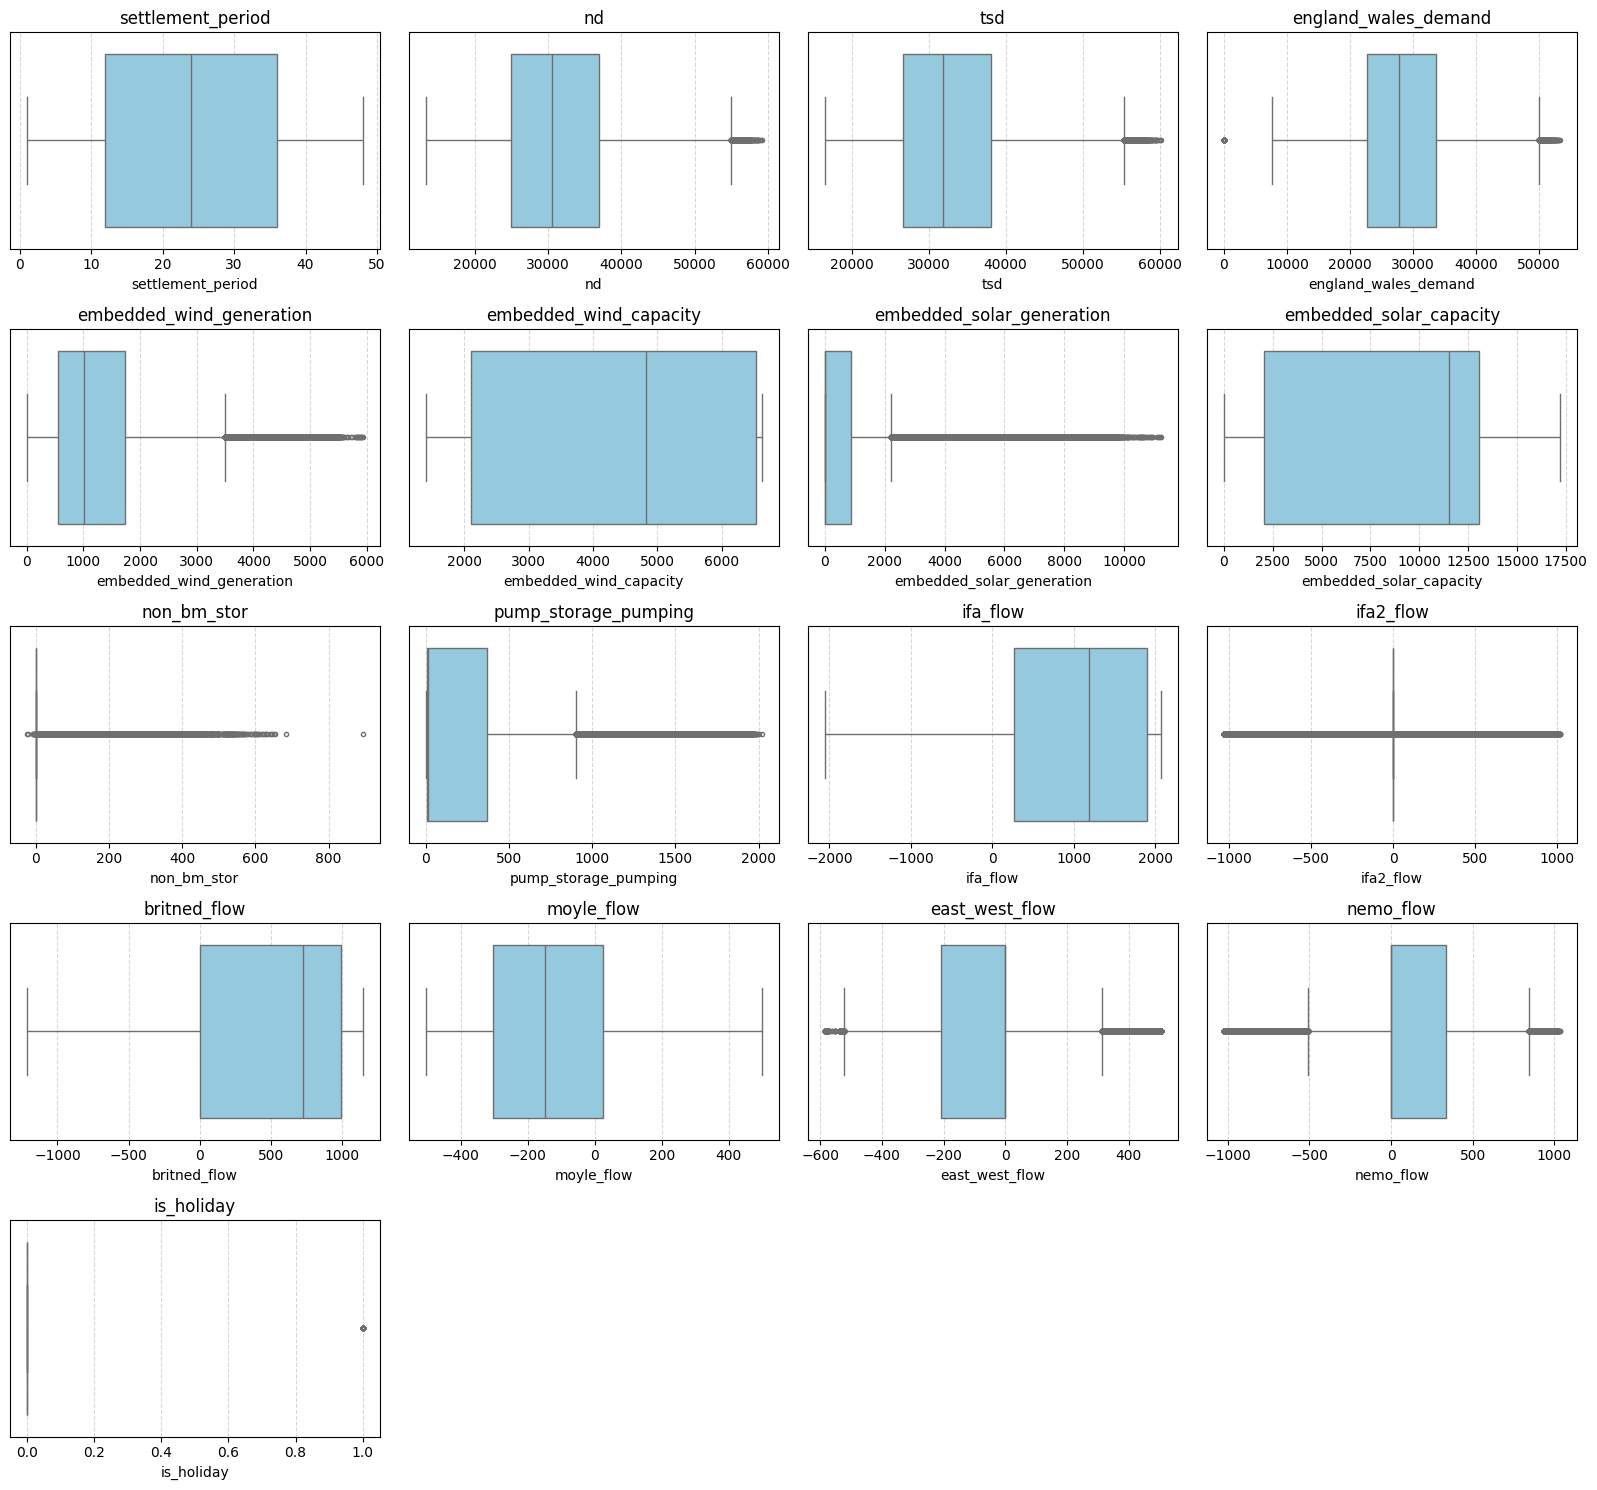

In [120]:
n_cols = 4
n_rows = int(np.ceil(len(numeric_cols) / n_cols))
fig, axes = plt.subplots(n_rows, n_cols, figsize=(4 * n_cols, 3 * n_rows), sharex=False)

for idx, col in enumerate(numeric_cols):
    row = idx // n_cols
    col_idx = idx % n_cols
    ax = axes[row, col_idx]
    sns.boxplot(x=df[col], ax=ax, color='skyblue', fliersize=3)
    ax.set_title(col, fontsize=12)
    ax.set_yticks([])
    ax.grid(True, axis='x', linestyle='--', alpha=0.5)

# Hide unused subplots
for idx in range(len(numeric_cols), n_rows * n_cols):
    row = idx // n_cols
    col_idx = idx % n_cols
    axes[row, col_idx].axis('off')

plt.tight_layout()
plt.show()

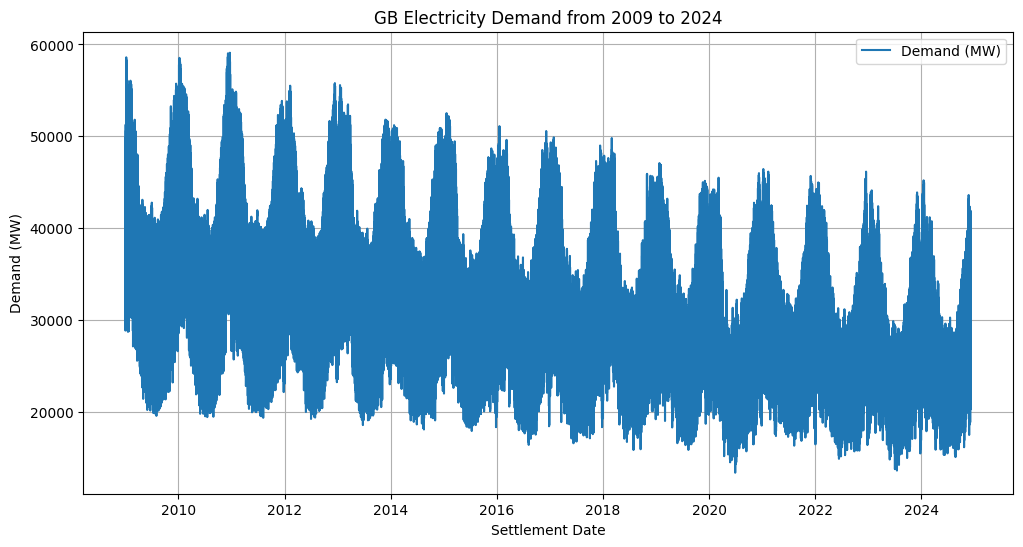

In [121]:
plt.figure(figsize=(12, 6))
plt.plot(df['settlement_date'], df['nd'], label='Demand (MW)')
plt.xlabel('Settlement Date')
plt.ylabel('Demand (MW)')
plt.title('GB Electricity Demand from 2009 to 2024')
plt.legend()
plt.grid()
plt.show()

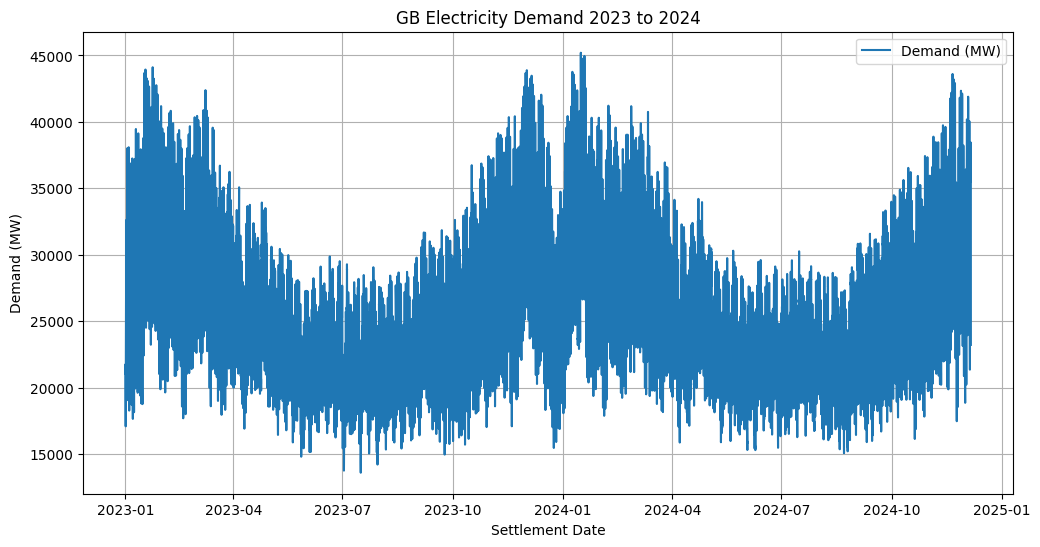

In [122]:
filtered_df = df[(df['settlement_date'].dt.year == 2023) | (df['settlement_date'].dt.year == 2024)]

plt.figure(figsize=(12, 6))
plt.plot(filtered_df['settlement_date'], filtered_df['nd'], label='Demand (MW)')
plt.xlabel('Settlement Date')
plt.ylabel('Demand (MW)')
plt.title('GB Electricity Demand 2023 to 2024')
plt.legend()
plt.grid()
plt.show()

In [150]:
df['period_hour'] = pd.to_datetime(df['period_hour'], format='%H:%M:%S').dt.time

TypeError: float() argument must be a string or a real number, not 'datetime.time'

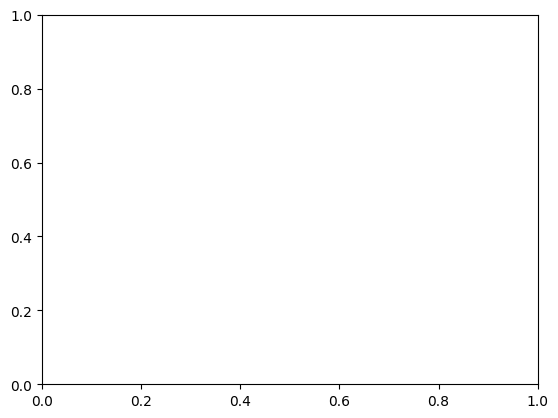

In [ ]:
winter_df = df[df['settlement_date'].dt.month.isin([12, 1, 2])]
summer_df = df[df['settlement_date'].dt.month.isin([6, 7, 8])]

avg_winter_df = winter_df.groupby('period_hour')['nd'].mean().to_frame().reset_index()
avg_summer_df = summer_df.groupby('period_hour')['nd'].mean().to_frame().reset_index()

avg_winter_df['period_hour'] = pd.to_datetime(avg_winter_df['period_hour'], format='%H:%M:%S').dt.time
avg_summer_df['period_hour'] = pd.to_datetime(avg_summer_df['period_hour'], format='%H:%M:%S').dt.time
plt.plot